# Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ouverture et traitement des relevés

In [5]:
tiahura = pd.read_csv('relevé houlographe/SondeSBE16Tiahura_View.csv',sep= ';')
tiahura['DateTime'] = tiahura['date'].astype('datetime64[ns]')
tiahura=tiahura[['DateTime','conductivite','salinite','oxygene','ph','fluorimetrie','turbidite']]
tiahura['DateTime']=tiahura['DateTime'].dt.date.astype('datetime64[ns]')
tiahura.replace(-99,np.nan,inplace=True)
tiahura.dropna(inplace=True)
tiahura = tiahura.groupby('DateTime').agg('mean').reset_index()

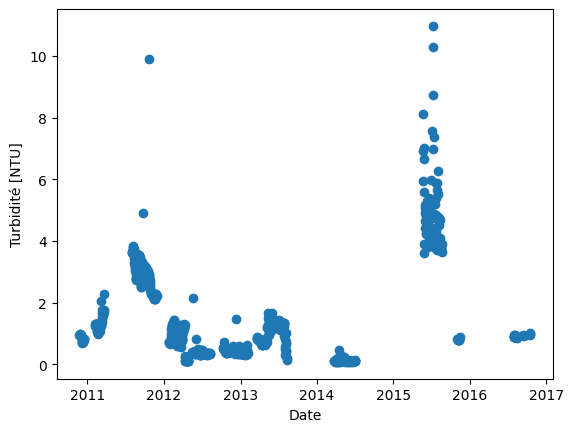

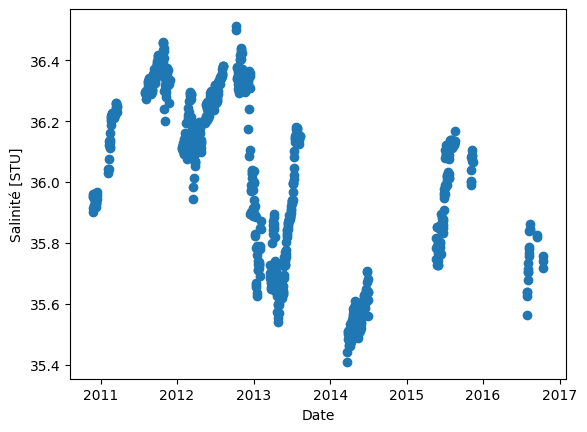

In [6]:
plt.scatter(tiahura['DateTime'],tiahura['turbidite'])
plt.xlabel('Date')
plt.ylabel('Turbidité [NTU]')
plt.show()
plt.scatter(tiahura['DateTime'],tiahura['salinite'])
plt.xlabel('Date')
plt.ylabel('Salinité [STU]')
plt.show()

In [7]:
haapiti = pd.read_csv('relevé houlographe/SondeSBE16Haapiti_View.csv',sep= ';')
haapiti['DateTime'] = haapiti['Date'].astype('datetime64[ns]')
haapiti = haapiti.rename(columns={'Conductivity (S/m)': 'conductivite'})
haapiti = haapiti.rename(columns={'Salinity, Practical (PSU)': 'salinite'})
haapiti = haapiti.rename(columns={'pH': 'ph'})
haapiti = haapiti.rename(columns={'Oxygen, SBE43 (mL/L)': 'oxygene'})
haapiti = haapiti.rename(columns={'Oxygen, SBE43 (% saturation)': 'o2'})
haapiti=haapiti[['DateTime','conductivite','salinite','oxygene','ph']]
haapiti['DateTime']=haapiti['DateTime'].dt.date.astype('datetime64[ns]')
haapiti.replace(-99,np.nan,inplace=True)
haapiti.dropna(inplace=True)
haapiti = haapiti.groupby('DateTime').agg('mean').reset_index()

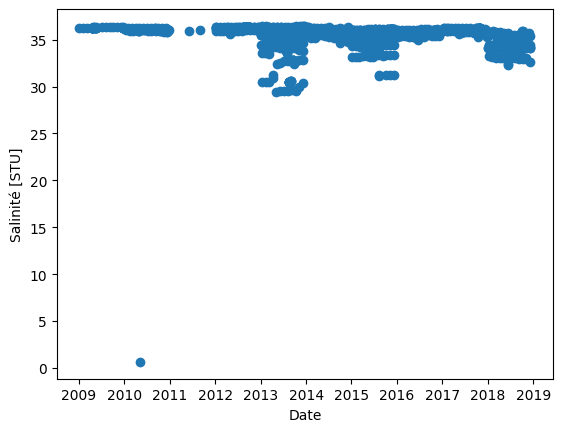

In [8]:
plt.scatter(haapiti['DateTime'],haapiti['salinite'])
plt.xlabel('Date')
plt.ylabel('Salinité [STU]')
plt.show()

il semblerait que la valeur 0 soit aberrante, on la retire

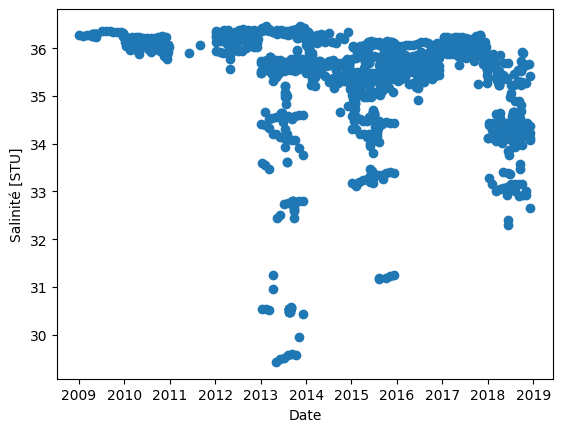

In [9]:
haapiti =haapiti[haapiti['DateTime']!=haapiti['DateTime'].values[haapiti['salinite'].idxmin()]]
plt.scatter(haapiti['DateTime'],haapiti['salinite'])
plt.xlabel('Date')
plt.ylabel('Salinité [STU]')
plt.show()

In [10]:
taotaha = pd.read_excel('relevé houlographe/taotaha2.xlsx')
taotaha['DateTime'] = taotaha['Date'].astype('datetime64[ns]')
taotaha.replace(-99,np.nan,inplace=True)
taotaha.dropna(inplace=True)
taotaha=taotaha[['DateTime','Salinity','Conductivity','O2 (mL/L)','pH','Fluorimetry (µg/L)','Turbidity (NTU)']]
taotaha = taotaha.rename(columns={'Conductivity': 'conductivite'})
taotaha = taotaha.rename(columns={'Salinity': 'salinite'})
taotaha = taotaha.rename(columns={'pH': 'ph'})
taotaha = taotaha.rename(columns={'Turbidity (NTU)': 'turbidite'})
taotaha['DateTime']=taotaha['DateTime'].dt.date.astype('datetime64[ns]')

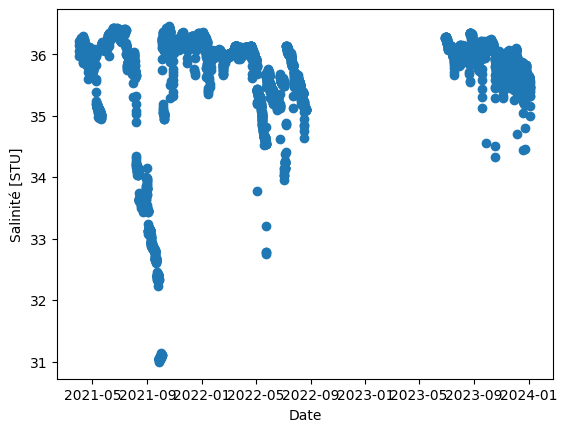

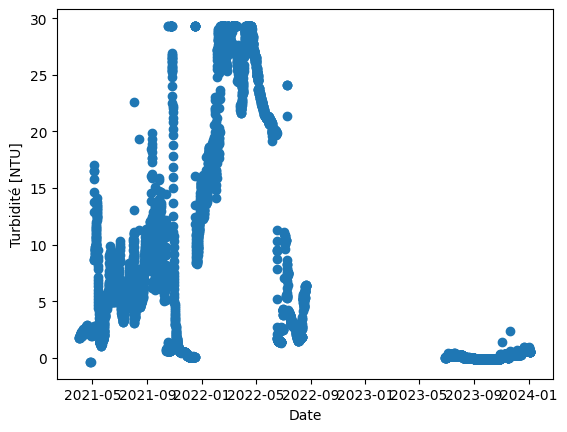

In [11]:
plt.scatter(taotaha['DateTime'],taotaha['salinite'])
plt.xlabel('Date')
plt.ylabel('Salinité [STU]')
plt.show()

plt.scatter(taotaha['DateTime'],taotaha['turbidite'])
plt.xlabel('Date')
plt.ylabel('Turbidité [NTU]')
plt.show()
plt.show()

# Combiner ? 

Salinité

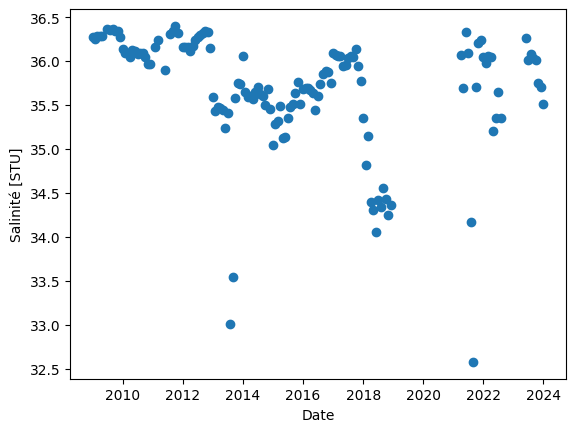

In [14]:
df_salinite = taotaha[['salinite','DateTime']]
df_salinite=df_salinite.merge(haapiti[['salinite','DateTime']], on=['DateTime','salinite'],how='outer')
df_salinite=df_salinite.merge(tiahura[['salinite','DateTime']], on=['DateTime','salinite'],how='outer')
df_salinite = df_salinite.groupby(pd.Grouper(key='DateTime', freq='MS')).mean().reset_index()
plt.scatter(df_salinite['DateTime'],df_salinite['salinite'])
plt.xlabel('Date')
plt.ylabel('Salinité [STU]')
plt.show()

Turbidité

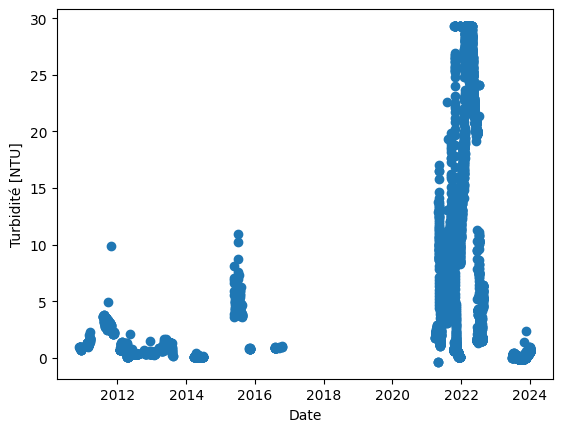

In [15]:
df_turbidite = taotaha[['turbidite','DateTime']]
df_turbidite=df_turbidite.merge(tiahura[['turbidite','DateTime']], on=['DateTime','turbidite'],how='outer')
plt.scatter(df_turbidite['DateTime'],df_turbidite['turbidite'])
plt.xlabel('Date')
plt.ylabel('Turbidité [NTU]')
plt.show()

# Exporter

In [17]:
df_salinite.to_csv('Tableaux finaux variables/salinite.csv', index = False)